In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
import tempfile
import pygraphviz
import matplotlib

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy      : 1.23.5
scipy      : 1.10.0
pomegranate: 0.14.4

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [26]:
# The guests initial door selection is completely random
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# The door the prize is behind is also completely random
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# Monty is dependent on both the guest and the prize. 
# modificam tabelul astfel incat:
# daca guest-ul alege prima usa, 60% sanse ca host-ul sa deschida a 2-a usa si 40% sanse sa deschida a 3-a
# daca guest-ul alege a 2-a usa, 60% sanse ca host-ul sa deschida prima usa si 40% sanse sa deschida a 3-a
# daca guest-ul alege a 3-a usa, 60% sanse ca host-ul sa deschida a 2-a usa so 40% sanse sa deschida prima
monty = ConditionalProbabilityTable(
        [[ 'A', 'A', 'A', 0.0 ],
         [ 'A', 'A', 'B', 0.6 ],
         [ 'A', 'A', 'C', 0.4 ],
         [ 'A', 'B', 'A', 0.0 ],
         [ 'A', 'B', 'B', 0.0 ],
         [ 'A', 'B', 'C', 1.0 ],
         [ 'A', 'C', 'A', 0.0 ],
         [ 'A', 'C', 'B', 1.0 ],
         [ 'A', 'C', 'C', 0.0 ],
         [ 'B', 'A', 'A', 0.0 ],
         [ 'B', 'A', 'B', 0.0 ],
         [ 'B', 'A', 'C', 1.0 ],
         [ 'B', 'B', 'A', 0.6 ],
         [ 'B', 'B', 'B', 0.0 ],
         [ 'B', 'B', 'C', 0.4 ],
         [ 'B', 'C', 'A', 1.0 ],
         [ 'B', 'C', 'B', 0.0 ],
         [ 'B', 'C', 'C', 0.0 ],
         [ 'C', 'A', 'A', 0.0 ],
         [ 'C', 'A', 'B', 1.0 ],
         [ 'C', 'A', 'C', 0.0 ],
         [ 'C', 'B', 'A', 1.0 ],
         [ 'C', 'B', 'B', 0.0 ],
         [ 'C', 'B', 'C', 0.0 ],
         [ 'C', 'C', 'A', 0.4 ],
         [ 'C', 'C', 'B', 0.6 ],
         [ 'C', 'C', 'C', 0.0 ]], [guest, prize]) 

In [27]:
s1# State objects hold both the distribution, and a high level name.
s1 = State(guest, name="Guest")
s2 = State(prize, name="Prize")
s3 = State(monty, name="Monty")

# Create the Bayesian network object with a useful name
model = BayesianNetwork("Monty Hall Problem")

# Add the three states to the network 
model.add_states(s1, s2, s3)

# Add edges which represent conditional dependencies, where the second node is 
# conditionally dependent on the first node (Monty is dependent on both guest and prize)
model.add_edge(s1, s3)
model.add_edge(s2, s3)

model.bake()

In [15]:
s1

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.3333333333333333,
                "B" : 0.3333333333333333,
                "C" : 0.3333333333333333
            }
        ],
        "frozen" : false
    },
    "name" : "Guest",
    "weight" : 1.0
}

In [16]:
model.probability(numpy.array(['A', 'B', 'C'], ndmin=2))

0.11111111111111109

In [18]:
model.predict_proba({})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.3333333333333333,
                   "B" : 0.3333333333333333,
                   "C" : 0.3333333333333333
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.3333333333333333,
                   "B" : 0.3333333333333333,
                   "C" : 0.3333333333333333
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.333333

### Putem observa ca pentru ultimul state, adica probabilitatea pentru care Monty deschide o usa, nu mai avem o distributie uniforma a probabilitatilor, data fiind asumptia ca host-ul e lenes. 

### A 2-a usa (Usa B) are de 2 ori 60% si 1 data 40% sanse de deschidere, pe vreme ce a 3-a usa (Usa C) are de 1 data 60% si de 2 ori 40% sanse de deschidere. Pentru prima usa (Usa A) avem1 1 data 60% si 1 data 40% => ramane la fel

In [22]:
model.predict_proba(numpy.array(['A', None, None], ndmin=2))

[array(['A', {
                 "class" : "Distribution",
                 "dtype" : "str",
                 "name" : "DiscreteDistribution",
                 "parameters" : [
                     {
                         "A" : 0.3333333333333334,
                         "B" : 0.3333333333333333,
                         "C" : 0.3333333333333333
                     }
                 ],
                 "frozen" : false
             }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "A" : 0.0,
                    "B" : 0.5333333333333332,
                    "C" : 0.46666666666666656
                }
            ],
            "frozen" : false
        }                                    ], dtype=object)]

### Aici putem observa diferenta de probabilitati in cazul in care invitatul alege usa A. Monty este mai probabil sa deschida usa B deoarece este mai aproape de usa A.

In [20]:
model.predict_proba({'Guest': 'A', 'Monty': 'C'})

array(['A', {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "A" : 0.2857142857142858,
                        "B" : 0.7142857142857141,
                        "C" : 0.0
                    }
                ],
                "frozen" : false
            }                                    , 'C'], dtype=object)

### Initial, probabilitatea ca invitatul sa castige daca schimba usile, era de 66%, cu asumptia ca host-ul e lenes, putem observa ca aceasta probabilitate a crescut la ~71%

### P(win by switching) = P(Monty opens door B) * P(win by switching given Monty opens door B) + P(Monty opens door A) * P(win by switching given Monty opens door A)

In [28]:
def plot(model, filename=None):
        """Draw this model's graph using pygraphviz.
        Returns
        -------
        None
        """

        if pygraphviz is not None:
            G = pygraphviz.AGraph(directed=True)

            for state in model.states:
                G.add_node(state.name, color='red')

            for parent, child in model.edges:
                G.add_edge(parent.name, child.name)

            if filename is None:
                with tempfile.NamedTemporaryFile(mode='w+b') as tf: # w+b is default mode already, just to make sure
                    G.draw(tf, format='png', prog='dot')
                    img = matplotlib.image.imread(tf)
                    plt.imshow(img)
                    plt.axis('off')
            else:
                G.draw(filename, format='pdf', prog='dot')

        else:
            raise ValueError("must have matplotlib and pygraphviz installed for visualization")

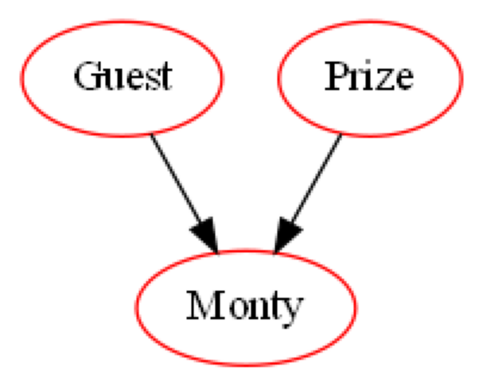

In [29]:
plot(model)